In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\Project\project_structure\project-structure-ewb\data\raw\easyview.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Handling Missing values

- Handling Missing values


- Handling Duplicates


- Check data type


- Understand the dataset

In [6]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**There are no null values in the dataset**

### Other Data Cleaning steps

#### Handling Duplicates

In [7]:
df.duplicated().sum()

0

**No Duplicates in the dataset**

#### Remove case_id from the dataset as it cannot used in Model Training

In [8]:
df.shape

(25480, 12)

In [9]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [10]:
df.drop(columns='case_id',inplace=True)

In [11]:
df.shape

(25480, 11)

### Feature Extraction

In [12]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [13]:
from datetime import date

In [14]:
current_year = date.today().year
current_year

2024

#### Subtract current year with year of estab to get company's age

In [15]:
df['company_age'] = current_year - df['yr_of_estab']
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [16]:
df.drop(columns='yr_of_estab',inplace=True)

### Type of Features

#### Numeric Features

In [17]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 3


#### Categorical Features

In [18]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 8


#### Discrete features

In [19]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


#### Continues Features

In [20]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


### Split X and y

In [23]:
X = df.drop('case_status', axis=1)
y = df['case_status']

In [24]:
X.shape, y.shape

((25480, 10), (25480,))

## Feature Transformation

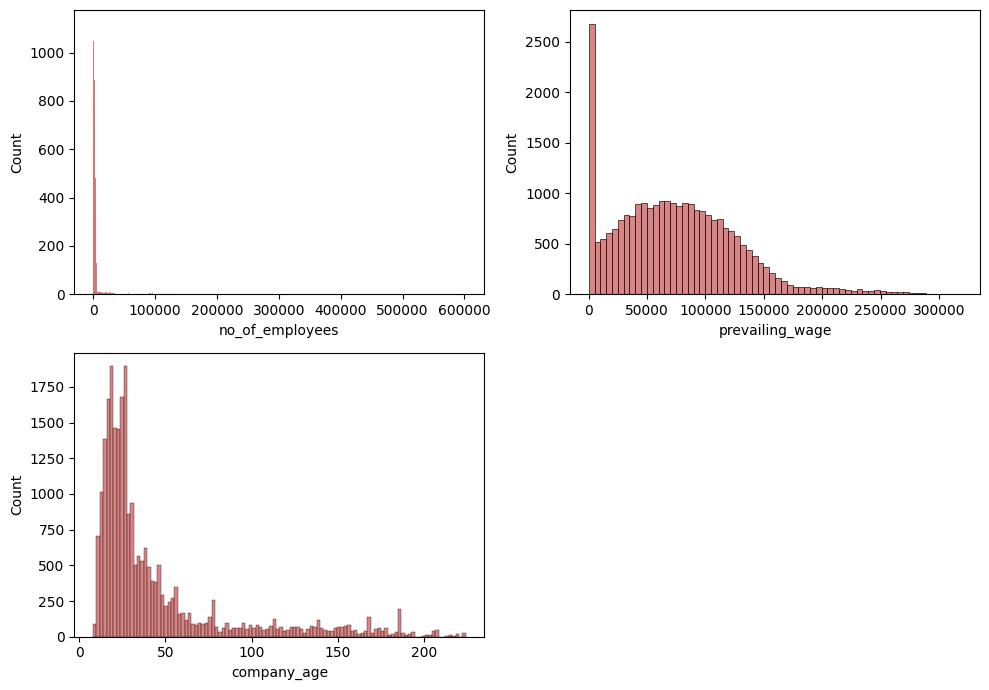

In [25]:
plt.figure(figsize=(10,7))
for i , col_name in enumerate(num_features):
    plt.subplot(2,2,i+1)
    sns.histplot(x=X[col_name], color='indianred')
    plt.xlabel(col_name)
    plt.tight_layout()

- No of employees and Copmany age column is skewed


- Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.


Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

### Checking Skewness

What is Skewness ?

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [26]:
X[num_features].skew()

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

- Positiviely Skewed : company_age, no_of_employees.


- We can handle outliers and then check the skewness.

In [27]:
df[num_features].describe()

,no_of_employees,prevailing_wage,company_age
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,74455.814592,44.590071
std,22877.928848,52815.942327,42.366929
min,-26.000000,2.136700,8.000000
25%,1022.000000,34015.480000,19.000000
50%,2109.000000,70308.210000,27.000000
75%,3504.000000,107735.512500,48.000000
max,602069.000000,319210.270000,224.000000


### Apply Power Transformer to Check if it can reduces the outliers

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
df['no_of_employees']

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64

In [30]:
df[df['no_of_employees'] < 0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
245,Europe,Master's,N,N,-25,Northeast,39452.9900,Year,Y,Certified,44
378,Asia,Bachelor's,N,Y,-11,Northeast,32506.1400,Year,Y,Denied,13
832,South America,Master's,Y,N,-17,South,129701.9400,Year,Y,Certified,22
2918,Asia,Master's,Y,N,-26,Midwest,112799.4600,Year,Y,Certified,19
6439,Asia,Bachelor's,N,N,-14,South,103.9700,Hour,Y,Denied,11
6634,Asia,Bachelor's,Y,N,-26,West,5247.3200,Year,Y,Denied,101
7224,Europe,Doctorate,N,N,-25,Midwest,141435.9500,Year,Y,Certified,26
7281,Asia,High School,N,N,-14,Midwest,58488.5000,Year,Y,Denied,24
7318,Asia,Bachelor's,Y,Y,-26,South,115005.6100,Year,Y,Certified,18
7761,Asia,Master's,N,N,-11,Midwest,38457.5100,Year,Y,Certified,15


As number of employess column has negative values, we will apply "yeo johnson" instaed of "box-cox"

In [31]:
yeo_j  = PowerTransformer(method = 'yeo-johnson')
box_cox = PowerTransformer(method='box-cox')

In [32]:
X['no_of_employees'] = yeo_j.fit_transform(df[['no_of_employees']])
X['company_age'] = box_cox.fit_transform(df[['company_age']])


In [33]:
from sklearn.preprocessing import FunctionTransformer

In [34]:
sqrt_trf = FunctionTransformer(np.sqrt)

In [35]:
X['prevailing_wage'] = sqrt_trf.fit_transform(df[['prevailing_wage']])
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,1.517300,West,24.335219,Hour,Y,-0.948252
1,Asia,Master's,Y,N,0.030912,Northeast,288.834987,Year,Y,-0.458617
2,Asia,Bachelor's,N,Y,2.885076,West,350.709082,Year,Y,-1.072750
3,Asia,Bachelor's,N,N,-1.343550,West,288.849494,Year,Y,1.627520
4,Africa,Master's,Y,N,-0.432287,South,387.178757,Year,Y,-0.729339


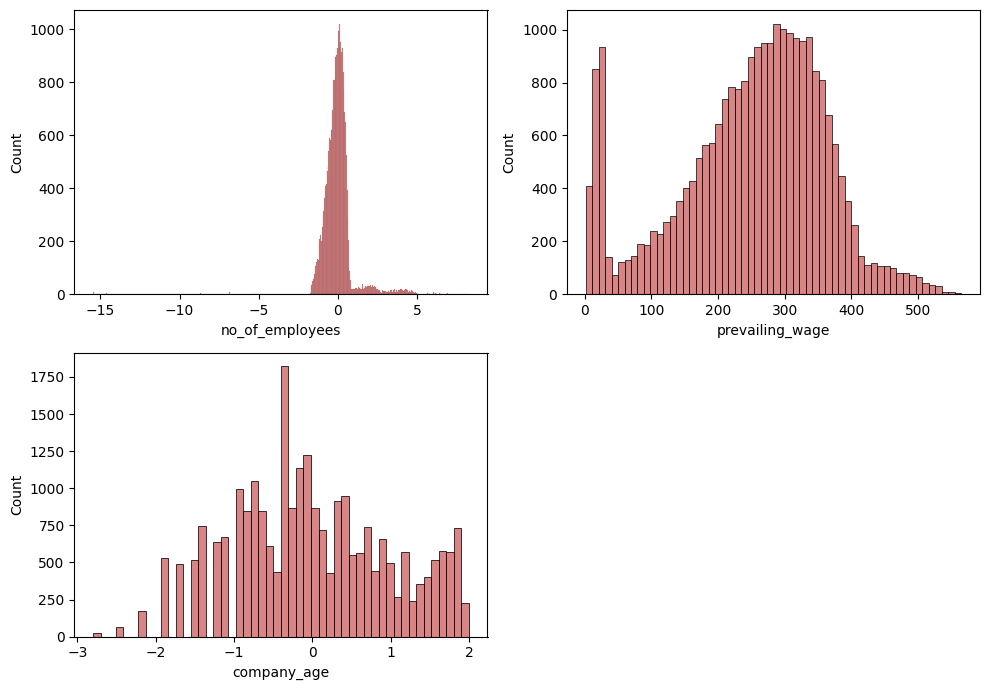

In [36]:
plt.figure(figsize=(10,7))
for i , col_name in enumerate(num_features):
    plt.subplot(2,2,i+1)
    sns.histplot(x=X[col_name], color='indianred')
    plt.xlabel(col_name)
    plt.tight_layout()

In [37]:
df[num_features].skew()

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [38]:
X[num_features].skew()

no_of_employees    0.399339
prevailing_wage   -0.443952
company_age        0.093798
dtype: float64

## Feature Encoding and Scaling

In [39]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


#### One Hot Encoding for Columns which had lesser unique values and not ordinal

- One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.


#### Ordinal Encoding for Columns which has many unique categories

- Ordinal encoding is used here as label encoder is supported for column transformer.


- Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

#### Standard Scaler

- Standardize features by removing the mean and scaling to unit variance.

## Column Transformer

In [83]:
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

In [84]:
cat_features

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [85]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [86]:
# Create Column Transformer with 3 types of transformers

ordinal_cols = ['education_of_employee','has_job_experience','requires_job_training','full_time_position']

ohe_cols = ['continent','region_of_employment','unit_of_wage']

yeo_cols = ['no_of_employees']

box_cox_cols = ['company_age']

sqrt_cols = ['prevailing_wage']

In [87]:
for i in ordinal_cols:
    print(df[i].unique())

['High School' "Master's" "Bachelor's" 'Doctorate']
['N' 'Y']
['N' 'Y']
['Y' 'N']


In [132]:
education_order = ['High School',"Bachelor's","Master's",'Doctorate']
experience_order = ['N','Y']
job_training_order = ['Y','N']
position_order = ['N','Y']

In [133]:
ss = StandardScaler()
ohe = OneHotEncoder(sparse_output=False)

yeo_johnson = PowerTransformer(method='yeo-johnson')
box_cox = PowerTransformer(method='box-cox')
sqrt_tranform = FunctionTransformer(np.sqrt)

In [134]:
ordinal_encode = OrdinalEncoder(categories=[education_order,experience_order,job_training_order,position_order]
                                ,handle_unknown='use_encoded_value', unknown_value=-1)

In [135]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe_transform',ohe,ohe_cols),
        ('ordinal_trf',ordinal_encode,ordinal_cols),
        ('yeo-johnson',yeo_johnson,yeo_cols),
        ('box-cox',box_cox,box_cox_cols),
        ('square_root',sqrt_tranform,sqrt_cols),
        ('standard_scaler',StandardScaler(),yeo_cols + box_cox_cols + sqrt_cols)
    
],
    remainder='passthrough')

In [136]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor)
])

In [137]:
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),  # Apply column transformations
#     ('model', RandomForestClassifier())  # Example ML model
# ])

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X = df.drop(columns='case_status')
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19


### Encoding Target Column :

In [140]:
from sklearn.preprocessing import LabelEncoder  

In [141]:
 
le = LabelEncoder()

In [142]:
y = le.fit_transform(y)
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [143]:
pd.Series(y).value_counts()

0    17018
1     8462
Name: count, dtype: int64

### output column is highly imbalanced

### Applying SMOTE + NN on the imbalanced class
> SMOTE (Synthetic Minority Over-sampling Technique) + Edited Nearest Neighbors (ENN) to handle class imbalance

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=234,stratify=y)

In [145]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17836, 10), (7644, 10), (17836,), (7644,))

In [146]:
pd.Series(y_train).value_counts()

0    11913
1     5923
Name: count, dtype: int64

In [147]:
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [148]:
pipeline.feature_names_in_

array(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position',
       'company_age'], dtype=object)

In [149]:
pipeline.named_steps

{'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_transform',
                                  OneHotEncoder(sparse_output=False),
                                  ['continent', 'region_of_employment',
                                   'unit_of_wage']),
                                 ('ordinal_trf',
                                  OrdinalEncoder(categories=[['High School',
                                                              "Bachelor's",
                                                              "Master's",
                                                              'Doctorate'],
                                                             ['N', 'Y'],
                                                             ['Y', 'N'],
                                                             ['N', 'Y']],
                                                 handle_unknown='use_encoded_value',
                                     

In [150]:
pipeline.named_steps['preprocessor']

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_transform',
                                 OneHotEncoder(sparse_output=False),
                                 ['continent', 'region_of_employment',
                                  'unit_of_wage']),
                                ('ordinal_trf',
                                 OrdinalEncoder(categories=[['High School',
                                                             "Bachelor's",
                                                             "Master's",
                                                             'Doctorate'],
                                                            ['N', 'Y'],
                                                            ['Y', 'N'],
                                                            ['N', 'Y']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['education_...as_job_experience',
                                  'requires_job_training',
                                  'full_time_position']),
                                ('yeo-johnson', PowerTransformer(),
                                 ['no_of_employees']),
                                ('box-cox', PowerTransformer(method='box-cox'),
                                 ['company_age']),
                                ('square_root',
                                 FunctionTransformer(func=<ufunc 'sqrt'>),
                                 ['prevailing_wage']),
                                ('standard_scaler', StandardScaler(),
                                 ['no_of_employees', 'company_age',
                                  'prevailing_wage'])])

In [151]:
pipeline.named_steps['preprocessor'].transformers_[0]

('ohe_transform',
 OneHotEncoder(sparse_output=False),
 ['continent', 'region_of_employment', 'unit_of_wage'])

In [152]:
pipeline.named_steps['preprocessor'].transformers_[1]

('ordinal_trf',
 OrdinalEncoder(categories=[['High School', "Bachelor's", "Master's",
                             'Doctorate'],
                            ['N', 'Y'], ['Y', 'N'], ['N', 'Y']],
                handle_unknown='use_encoded_value', unknown_value=-1),
 ['education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'full_time_position'])

In [153]:
pipeline.named_steps['preprocessor'].transformers_[1][1]

OrdinalEncoder(categories=[['High School', "Bachelor's", "Master's",
                            'Doctorate'],
                           ['N', 'Y'], ['Y', 'N'], ['N', 'Y']],
               handle_unknown='use_encoded_value', unknown_value=-1)

In [154]:
sample_df_ord = df[['education_of_employee','has_job_experience',
  'requires_job_training',
  'full_time_position']]
sample_df_ord

,education_of_employee,has_job_experience,requires_job_training,full_time_position
0,High School,N,N,Y
1,Master's,Y,N,Y
2,Bachelor's,N,Y,Y
3,Bachelor's,N,N,Y
4,Master's,Y,N,Y
...,...,...,...,...
25475,Bachelor's,Y,Y,Y
25476,High School,Y,N,Y
25477,Master's,Y,N,N
25478,Master's,Y,Y,Y


In [156]:
ordinal_encoder1 = OrdinalEncoder(
    categories=[
        ['High School',  "Bachelor's", "Master's",'Doctorate'],
        ['N', 'Y'],
        ['Y', 'N'],
        ['N', 'Y']
    ],
    handle_unknown='use_encoded_value', 
    unknown_value=-1
)

In [157]:
ordinal_encoder1.fit(sample_df_ord)

# Inspect the categories used after fitting
print("Categories used for encoding:")
print(ordinal_encoder1.categories_)

# Transform the sample data
encoded_data = ordinal_encoder1.transform(sample_df_ord)
print("\nEncoded Data:")
print(encoded_data)


Categories used for encoding:
[array(['High School', "Bachelor's", "Master's", 'Doctorate'], dtype=object), array(['N', 'Y'], dtype=object), array(['Y', 'N'], dtype=object), array(['N', 'Y'], dtype=object)]

Encoded Data:
[[0. 0. 1. 1.]
 [2. 1. 1. 1.]
 [1. 0. 0. 1.]
 ...
 [2. 1. 1. 0.]
 [2. 1. 0. 1.]
 [1. 1. 1. 1.]]


In [158]:
pd.concat([sample_df_ord,encoded_df],axis=1)

,education_of_employee,has_job_experience,requires_job_training,full_time_position,education_of_employee,has_job_experience,requires_job_training,full_time_position
0,High School,N,N,Y,0.0,0.0,1.0,1.0
1,Master's,Y,N,Y,1.0,1.0,1.0,1.0
2,Bachelor's,N,Y,Y,2.0,0.0,0.0,1.0
3,Bachelor's,N,N,Y,2.0,0.0,1.0,1.0
4,Master's,Y,N,Y,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
25475,Bachelor's,Y,Y,Y,2.0,1.0,0.0,1.0
25476,High School,Y,N,Y,0.0,1.0,1.0,1.0
25477,Master's,Y,N,N,1.0,1.0,1.0,0.0
25478,Master's,Y,Y,Y,1.0,1.0,0.0,1.0


In [171]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
smote_enn = SMOTEENN(smote=None, enn=EditedNearestNeighbours(n_neighbors=3),sampling_strategy='auto')

In [172]:
X_train_transformed


array([[ 0.        ,  0.        ,  1.        , ..., -0.06177891,
         0.03704577, -1.15473996],
       [ 0.        ,  1.        ,  0.        , ..., -0.1202476 ,
        -0.57983305,  2.03592868],
       [ 0.        ,  1.        ,  0.        , ...,  1.14052598,
        -0.36629807, -0.49832357],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.11834249,
        -0.4374764 , -0.43500799],
       [ 0.        ,  1.        ,  0.        , ..., -0.21795245,
        -0.67473748,  1.62163509],
       [ 0.        ,  1.        ,  0.        , ..., -0.15757866,
        -0.79336802, -0.38126277]])

In [173]:
X_train_transformed.shape

(17836, 25)

In [174]:
pd.Series(y_train).value_counts()

0    11913
1     5923
Name: count, dtype: int64

In [175]:
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_transformed,y_train)
pd.Series(y_train_resampled).value_counts()

0    11913
1     7041
Name: count, dtype: int64

After applying SMOTEENN : classes of y_train has changed (0 : 11913, 1 : 5923) to only (0:11913, 1:7041). The classes are still highly imbalanced

Due to applying `RandomOverSampler` size of y_train 0 and 1 have become equal

In [178]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto')
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_transformed, y_train)

pd.Series(y_train).value_counts()

0    11913
1     5923
Name: count, dtype: int64

In [179]:
pd.Series(y_train_resampled).value_counts()

0    11913
1    11913
Name: count, dtype: int64